In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def nse(predictions, targets):
    """
    Compute the Nash-Sutcliff-Efficiency
    """
    return 1 - (np.sum((targets - predictions) ** 2) / np.sum((targets - np.mean(targets)) ** 2))

# Site with GISID 58 (will be used for Lugano)

In [61]:
simu = pd.read_csv('./58_flashy_new/ref_flow_flashy_new_fluxes.txt', sep='\t')
true = pd.read_csv('./dataQuentin/GISID-58_BAFU-2349.csv')

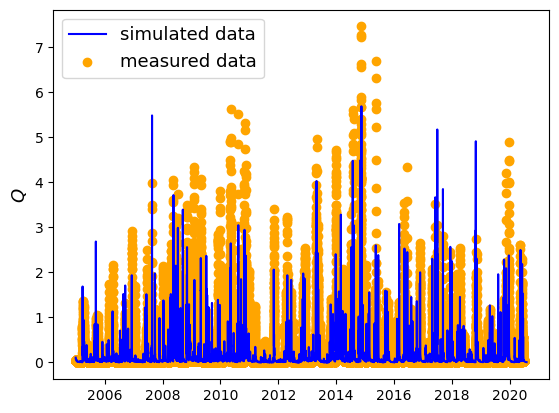

In [62]:
plt.plot(simu['t'], (simu['q']), label='simulated data', color='blue')
plt.scatter(simu['t'], (true['Q_mmhr']), label='measured data', color='orange')
plt.ylabel('$Q$', fontsize=13)
plt.legend(fontsize=13)

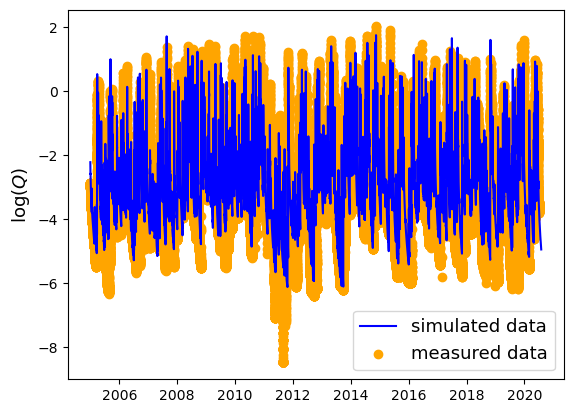

In [63]:
plt.plot(simu['t'], np.log(simu['q']), label='simulated data', color='blue')
plt.scatter(simu['t'], np.log(true['Q_mmhr']), label='measured data', color='orange')
plt.ylabel('$\log(Q)$', fontsize=13)
plt.legend(fontsize=13)
plt.show()

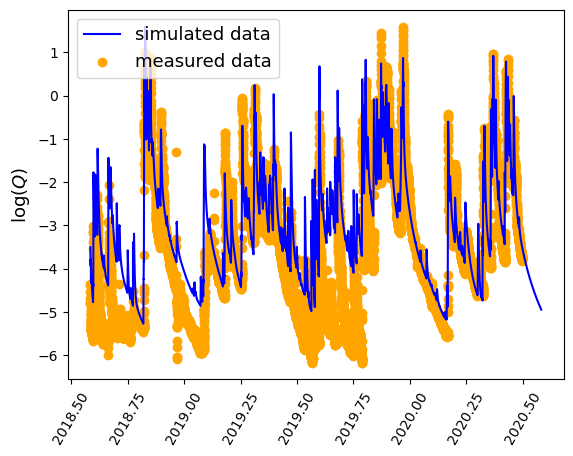

In [64]:
plt.plot(simu['t'][-24*365*2:], np.log(simu['q'][-24*365*2:]), label='simulated data', color='blue')
plt.scatter(simu['t'][-24*365*2:], np.log(true['Q_mmhr'][-24*365*2:]), label='measured data', color='orange')
plt.ylabel('$\log(Q)$', fontsize=13)
plt.legend(fontsize=13)
plt.xticks(rotation=60)
plt.show()

In [65]:
print('NSE on log(Q): ', nse(np.log(simu['q']), np.log(true['Q_mmhr'])))
print('NSE on Q: ', nse(simu['q'], true['Q_mmhr']))

NSE on log(Q):  0.6567813209936324
NSE on Q:  0.7382876882926126


# Site with GISID 81 (will be used for Pully)

In [66]:
simu = pd.read_csv('./81_flashy_new/ref_flow_flashy_new_fluxes.txt', sep='\t')
true = pd.read_csv('./dataQuentin/GISID-81_BAFU-2432.csv')

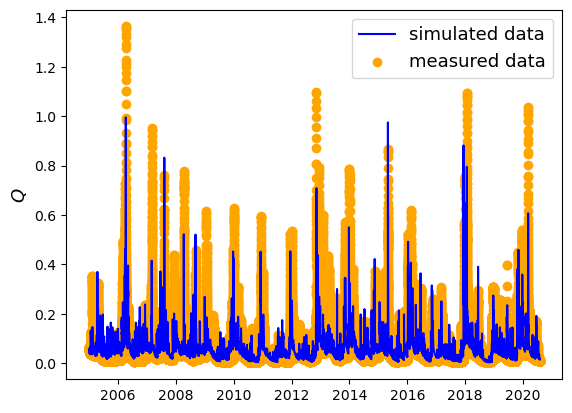

In [67]:
plt.plot(simu['t'], simu['q'], label='simulated data', color='blue')
plt.scatter(simu['t'], true['Q_mmhr'], label='measured data', color='orange')
plt.ylabel('$Q$', fontsize=13)
plt.legend(fontsize=13)
plt.show()

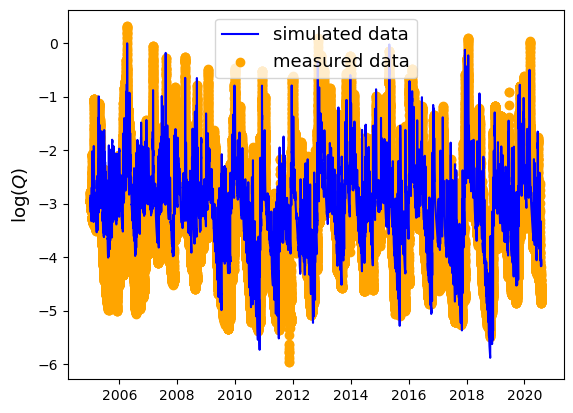

In [68]:
plt.plot(simu['t'], np.log(simu['q']), label='simulated data', color='blue')
plt.scatter(simu['t'], np.log(true['Q_mmhr']), label='measured data', color='orange')
plt.ylabel('$\log(Q)$', fontsize=13)
plt.legend(fontsize=13)
plt.show()

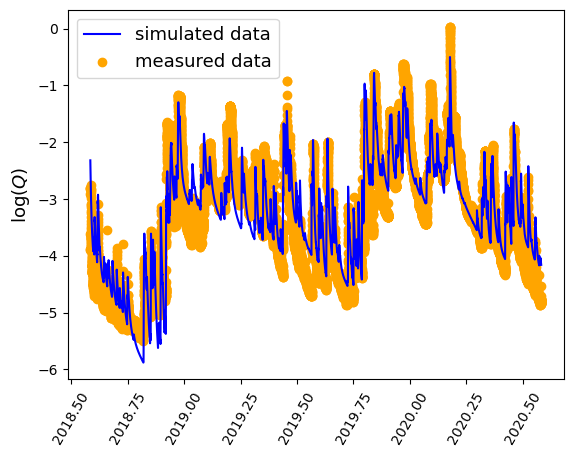

In [69]:
plt.plot(simu['t'][-24*365*2:], np.log(simu['q'][-24*365*2:]), label='simulated data', color='blue')
plt.scatter(simu['t'][-24*365*2:], np.log(true['Q_mmhr'][-24*365*2:]), label='measured data', color='orange')
plt.ylabel('$\log(Q)$', fontsize=13)
plt.legend(fontsize=13)
plt.xticks(rotation=60)
plt.show()

In [70]:
print('NSE on log(Q): ', nse(np.log(simu['q']), np.log(true['Q_mmhr'])))
print('NSE on Q: ', nse(simu['q'], true['Q_mmhr']))

NSE on log(Q):  0.5882217118627843
NSE on Q:  0.7181199961066016


# Site with GISID 25 (will be used for Basel)

In [3]:
simu = pd.read_csv('./2199_flashy_new/ref_flow_flashy_new_fluxes.txt', sep='\t')
true = pd.read_csv('./dataQuentin/GISID-25_BAFU-2199.csv')

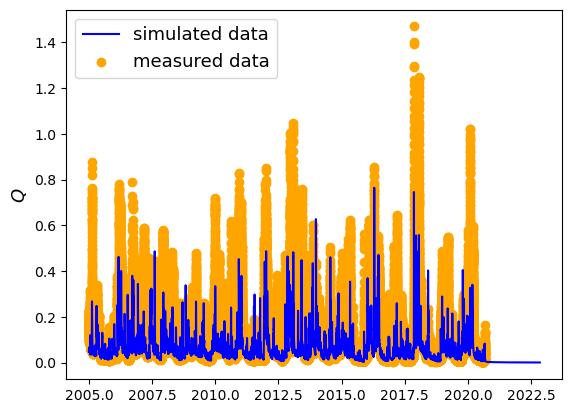

In [4]:
plt.plot(simu['t'], simu['q'], label='simulated data', color='blue')
plt.scatter(simu['t'], true['Q_mmhr'], label='measured data', color='orange')
plt.ylabel('$Q$', fontsize=13)
plt.legend(fontsize=13)
plt.show()

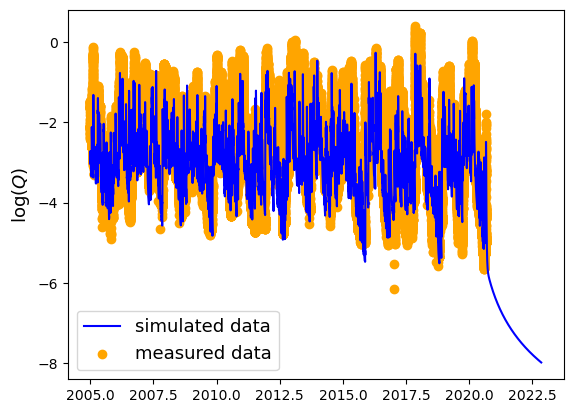

In [5]:
plt.plot(simu['t'], np.log(simu['q']), label='simulated data', color='blue')
plt.scatter(simu['t'], np.log(true['Q_mmhr']), label='measured data', color='orange')
plt.ylabel('$\log(Q)$', fontsize=13)
plt.legend(fontsize=13)
plt.show()

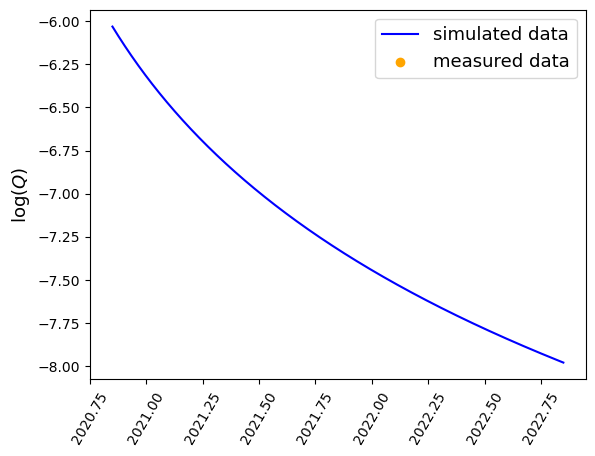

In [6]:
plt.plot(simu['t'][-24*365*2:], np.log(simu['q'][-24*365*2:]), label='simulated data', color='blue')
plt.scatter(simu['t'][-24*365*2:], np.log(true['Q_mmhr'][-24*365*2:]), label='measured data', color='orange')
plt.ylabel('$\log(Q)$', fontsize=13)
plt.legend(fontsize=13)
plt.xticks(rotation=60)
plt.show()

In [7]:
print('NSE on log(Q): ', nse(np.log(simu['q']), np.log(true['Q_mmhr'])))
print('NSE on Q: ', nse(simu['q'], true['Q_mmhr']))

NSE on log(Q):  0.6873419763508313
NSE on Q:  0.5853378491970789


# Site Monthey (streamflow values directly used with Sion precipitation data)

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pandas.tseries.offsets import DateOffset

# Load data
dat1 = pd.read_csv("./Sion_flashy_new/ref_flow_flashy_new_fluxes.txt", sep='\t')
dat1bis = pd.read_csv("../3_long_stations/Sion.csv", sep=',')
dat1['datetime'] = dat1bis['datetime']
dat2 = pd.read_csv("./dataQuentin/morge_conthey.csv", sep=";", na_values=["NA", ".", "", "#N/A"])

# Convert 'Time' column to datetime, ensuring they are timezone-naive
dat2['Time'] = pd.to_datetime(dat2['Time'], errors='coerce', utc=True).dt.tz_localize(None)

dat1['datetime'] = pd.to_datetime(dat1['datetime'], errors='coerce', utc=True).dt.tz_localize(None)


# Create complete datetime sequence
complete_datetime = pd.date_range(start=dat2['Time'].min(), end=dat2['Time'].max(), freq='5T')

# Replace negative discharge values with 0 and fill NA values with mean
q = dat2['Discharge [m3/s]'].copy()
q[q < 0] = 0
mean_q = q.mean()
q.fillna(mean_q, inplace=True)
dat2['Discharge [m3/s]'] = q

# Create a DataFrame for the complete datetime range
df_complete = pd.DataFrame({'Time': complete_datetime})

# Merge with the original dataframe and fill missing values
df_complete = df_complete.merge(dat2, on='Time', how='left')
df_complete['Discharge [m3/s]'].fillna(mean_q, inplace=True)

# Convert datetime to fractional year
def fractional_year(dt):
    start = datetime(dt.year, 1, 1)
    end = datetime(dt.year + 1, 1, 1)
    return dt.year + (dt - start) / (end - start)

#df_complete['t'] = df_complete['Time'].apply(lambda x: fractional_year(x))
df_complete['datetime'] = df_complete['Time']

# Merge with the original data
dat = pd.merge(dat1, df_complete, on='datetime', how='inner')

# Handle missing values and convert units
dat['p'].fillna(0, inplace=True)
dat['pet'].fillna(dat['pet'], inplace=True)  # Handling different column headers; assuming 'pet' is present

q = dat['Discharge [m3/s]'].copy()
q[q < 0] = 0
q.fillna(0, inplace=True)

# Convert cubic meters per second to millimeters per hour
# Assuming area of Sion is 80 km^2 = 80 * 1,000,000 m^2
dat['q_true'] = q * 3600 * 1000 / (80 * 1_000_000)

# Check the final dataframe
print(dat.head())

             t    p       pet        et         R         q  \
0  2016.795879  0.3  0.067409  0.011243  0.001650  0.016041   
1  2016.795993  0.0  0.067409  0.011247  0.001679  0.015878   
2  2016.796107  0.0  0.067409  0.011247  0.001676  0.015718   
3  2016.796220  0.0  0.067409  0.011246  0.001672  0.015561   
4  2016.796334  0.0  0.067409  0.011246  0.001669  0.015408   

             datetime                Time  Discharge [m3/s]    q_true  
0 2016-10-18 06:00:00 2016-10-18 06:00:00           0.42000  0.018900  
1 2016-10-18 07:00:00 2016-10-18 07:00:00           0.39000  0.017550  
2 2016-10-18 08:00:00 2016-10-18 08:00:00           0.36000  0.016200  
3 2016-10-18 09:00:00 2016-10-18 09:00:00           0.36000  0.016200  
4 2016-10-18 10:00:00 2016-10-18 10:00:00           1.31447  0.059151  


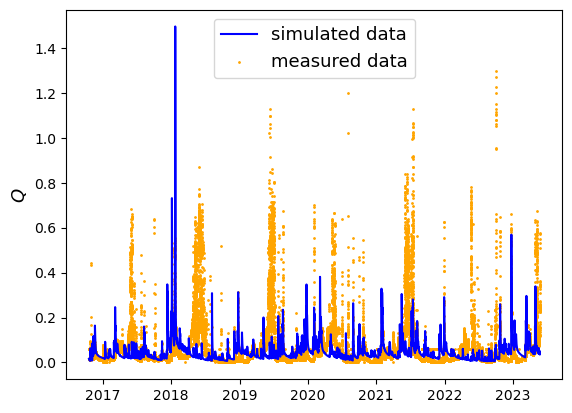

In [9]:
plt.plot(dat['t'], dat['q'], label='simulated data', color='blue')
plt.scatter(dat['t'], dat['q_true'], label='measured data', color='orange', s=1)
plt.ylabel('$Q$', fontsize=13)
plt.legend(fontsize=13)
plt.show()

/home/duchemin/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


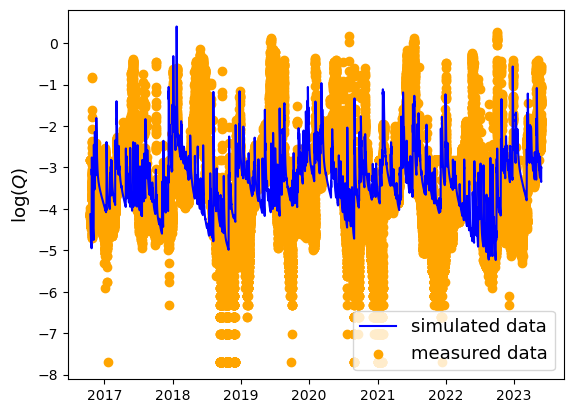

In [10]:
plt.plot(dat['t'], np.log(dat['q']), label='simulated data', color='blue')
plt.scatter(dat['t'], np.log(dat['q_true']), label='measured data', color='orange')
plt.ylabel('$\log(Q)$', fontsize=13)
plt.legend(fontsize=13)
plt.show()

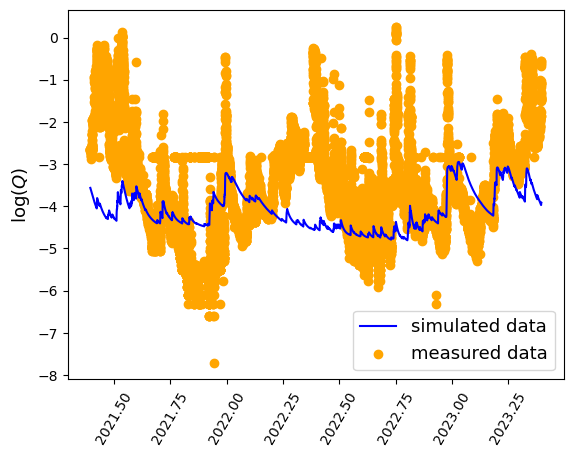

In [80]:
plt.plot(dat['t'][-24*365*2:], np.log(dat['q'][-24*365*2:]), label='simulated data', color='blue')
plt.scatter(dat['t'][-24*365*2:], np.log(dat['q_true'][-24*365*2:]), label='measured data', color='orange')
plt.ylabel('$\log(Q)$', fontsize=13)
plt.legend(fontsize=13)
plt.xticks(rotation=60)
plt.show()

In [84]:
print('NSE on Q: ', nse(dat['q'], dat['q_true']))

NSE on Q:  -0.1499973462929134


## Appendix

In [3]:
from datetime import datetime

def fractional_year(date_time_str):
    # Convert the string to a datetime object
    date_time = datetime.strptime(date_time_str, "%Y-%m-%d %H:%M:%S")
    
    # Extract the year
    year = date_time.year
    
    # Calculate the start of the year and the next year's start
    start_of_year = datetime(year, 1, 1)
    start_of_next_year = datetime(year + 1, 1, 1)
    
    # Calculate the total seconds in the year
    year_duration = (start_of_next_year - start_of_year).total_seconds()
    
    # Calculate the seconds from the start of the year to the given date
    time_elapsed = (date_time - start_of_year).total_seconds()
    
    # Calculate the fractional year
    fractional_year_value = year + time_elapsed / year_duration
    
    return fractional_year_value

In [72]:
simu = pd.read_csv('./Sion_flashy_new/ref_flow_flashy_new_fluxes.txt', sep='\t')
true1 = pd.read_csv('./dataQuentin/morge_conthey.csv', sep=';')

In [73]:
true1['Discharge [m3/s]'] = true1['Discharge [m3/s]'].apply(lambda x: max(x,0))
true1['q_true'] = true1['Discharge [m3/s]']*3600*1000 / (80 * 1e6)

In [74]:
true1['t'] = [fractional_year(datetime[:-4]) for datetime in true1['Time']]

In [75]:
df = pd.merge(true1, simu, on='t', how='inner')